In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
boston = load_boston()

In [5]:
type(boston)

sklearn.utils.Bunch

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [13]:
data = boston.data

In [14]:
data.shape

(506, 13)

In [16]:
data = pd.DataFrame(data = data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
data['price'] = boston.target 

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [21]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

## DATA VISUALIZATION

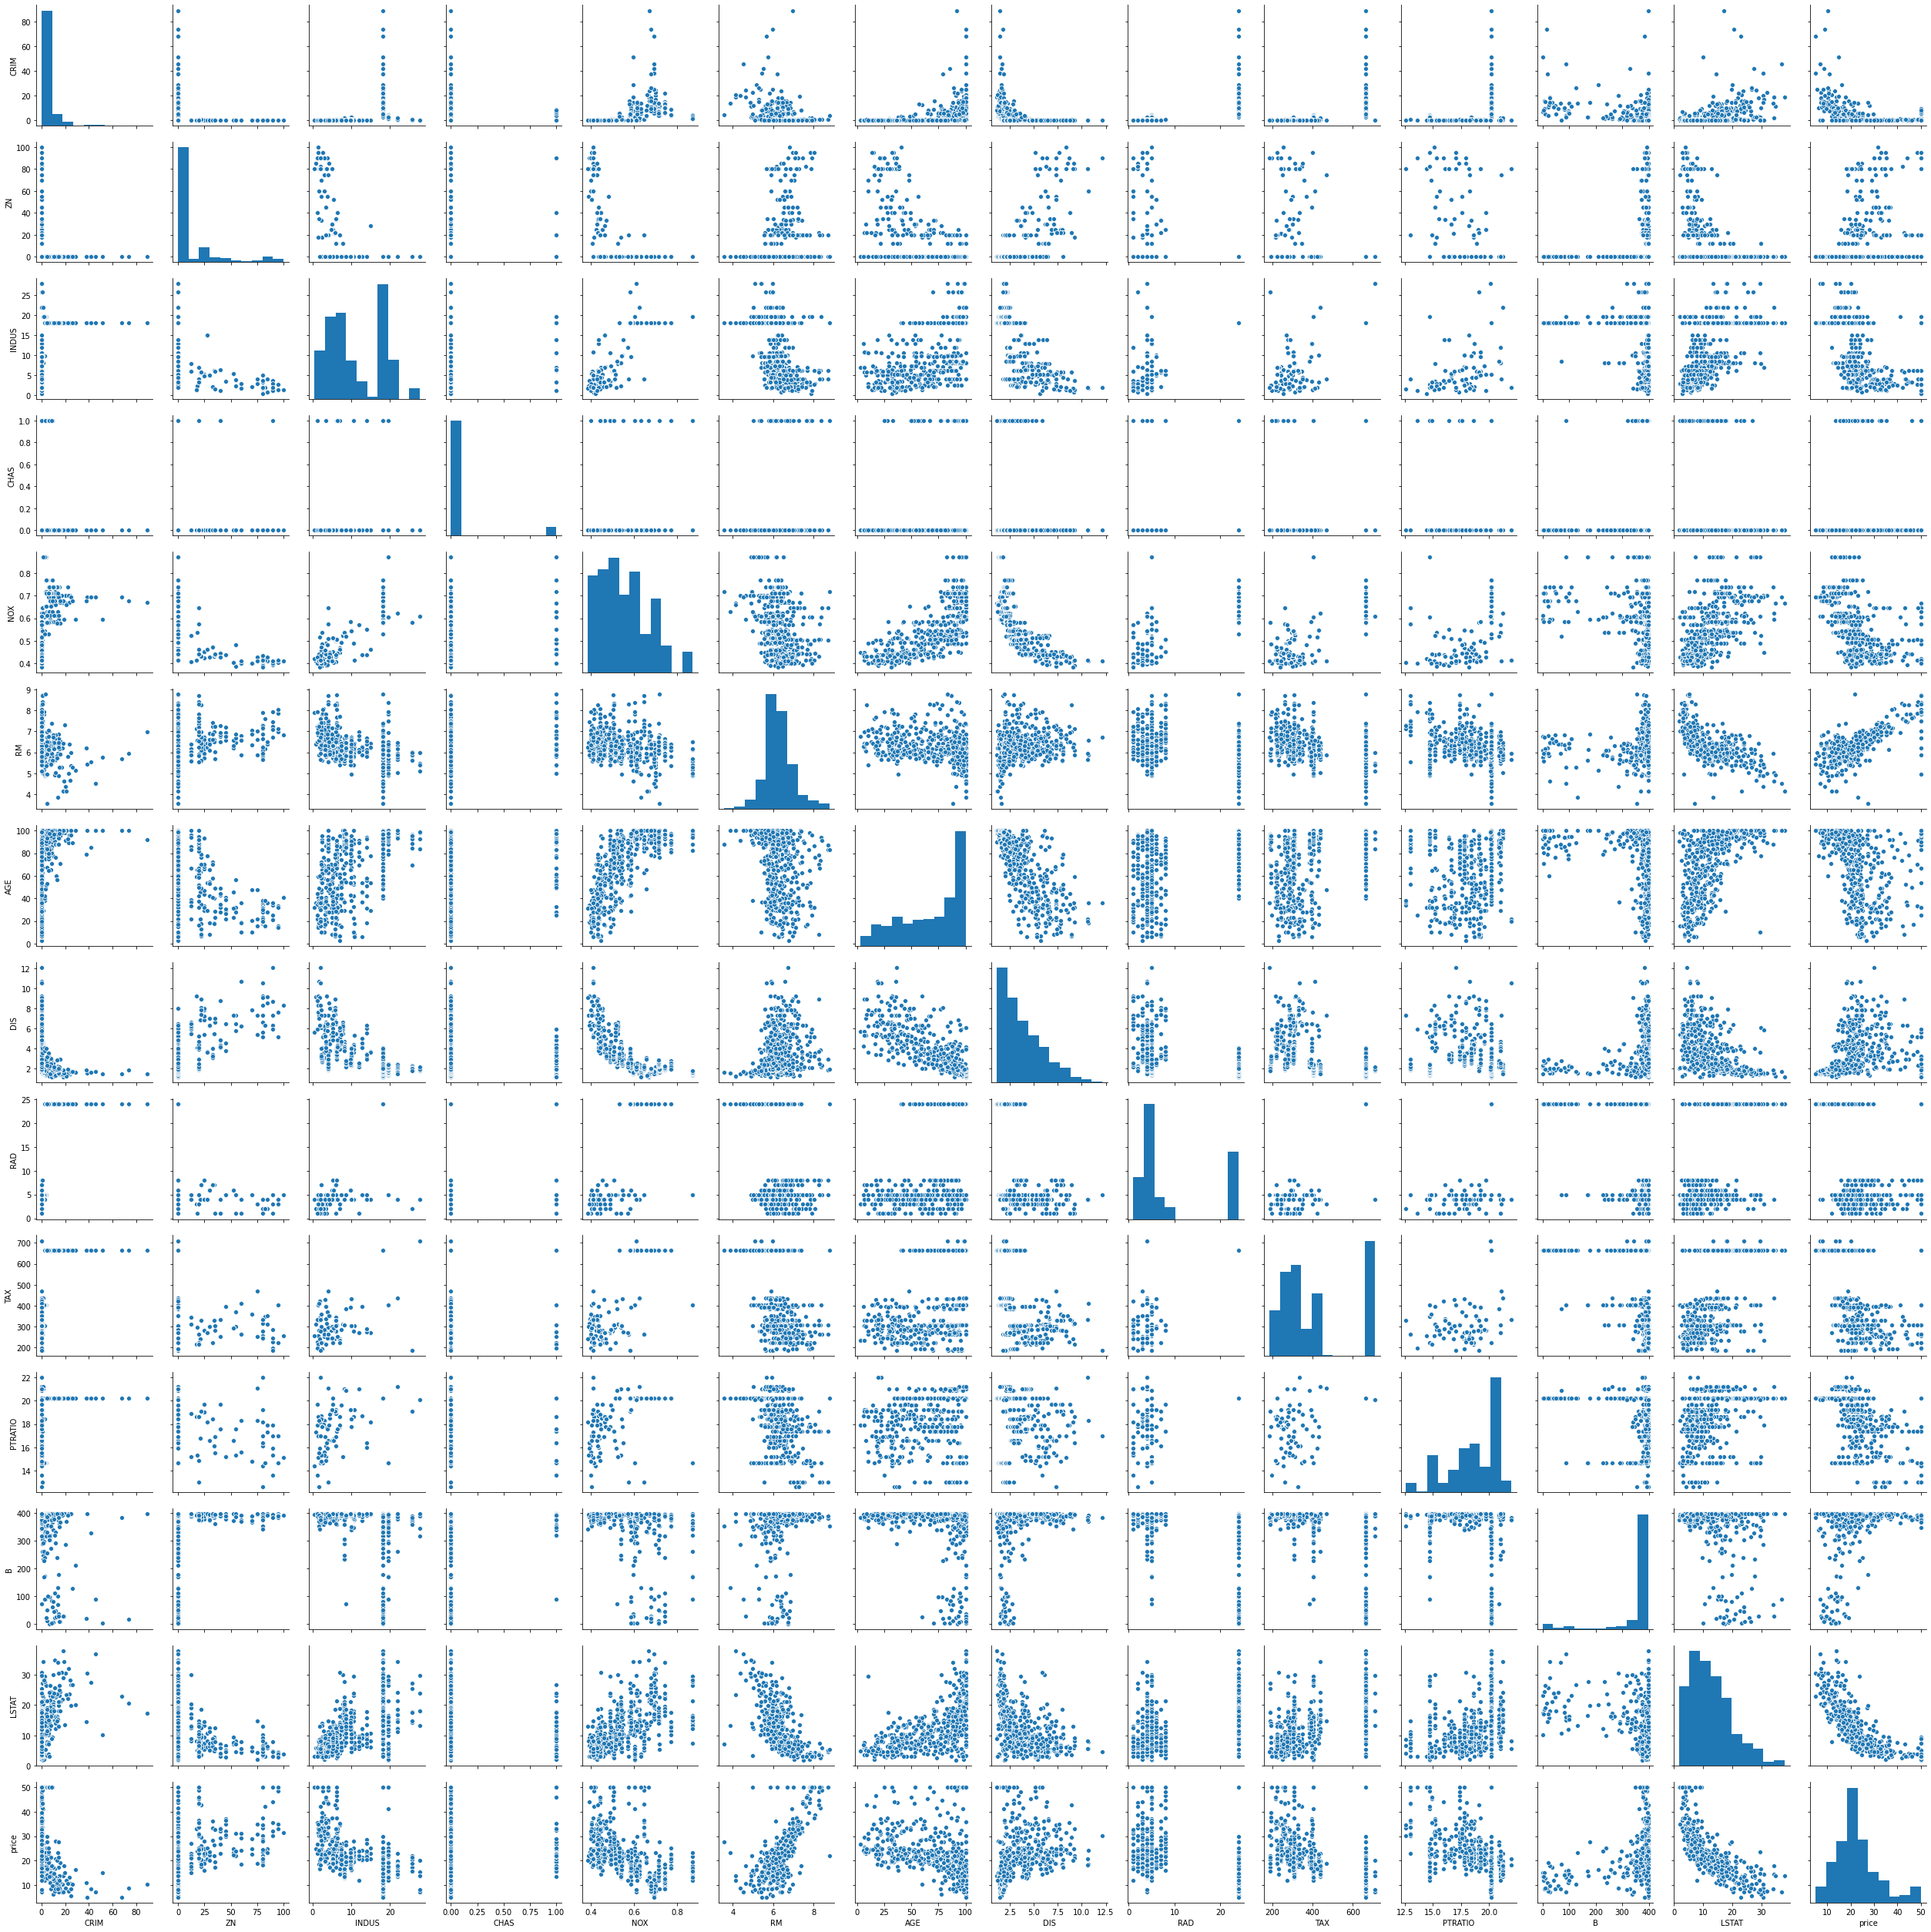

In [22]:
sns.pairplot(data)

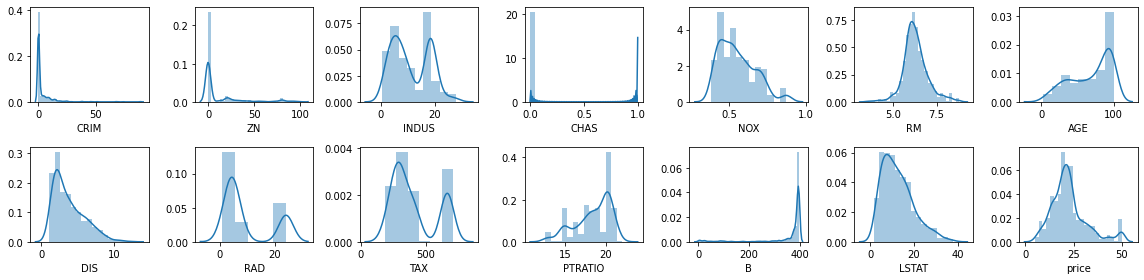

In [24]:
rows=2
cols=7

fig,ax =plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))

col =data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax = ax[i][j])
        index= index+1
plt.tight_layout()

In [35]:
cormat = data.corr()
cormat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


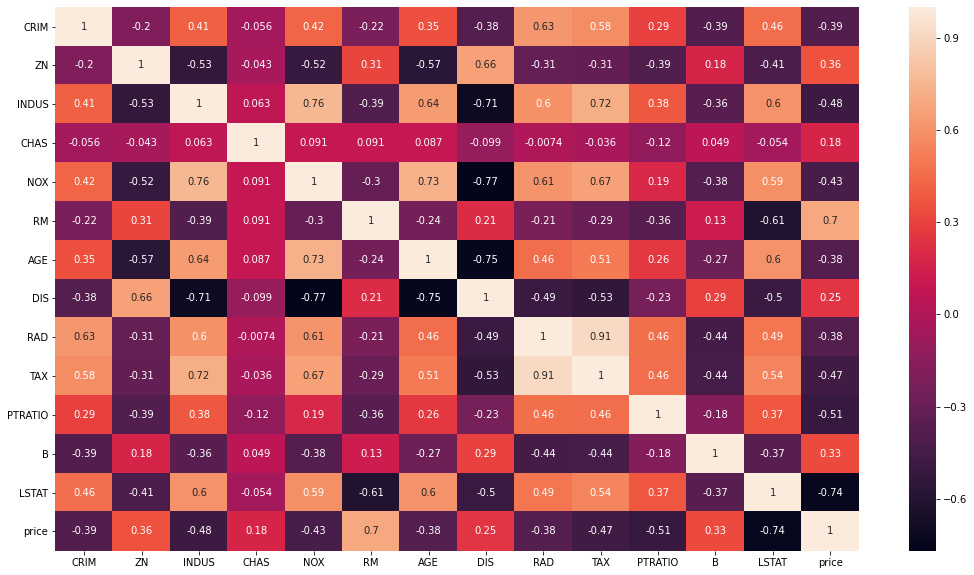

In [38]:
fig,ax =plt.subplots(figsize = (18,10))
sns.heatmap(cormat,annot= True)

In [39]:
def get_cor_data(cordata,thresold):
    feature = []
    value =[]
    for i ,index in enumerate(cordata.index):
        if abs(cordata[index])> thresold:
            feature.append(index)
            value.append(cordata[index])
    df = pd.DataFrame(data=value,index=feature,columns=['corr value'])
    return df
    

In [40]:
corr_value = get_cor_data(cormat['price'],0.50)
corr_value

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
price,1.000000


In [42]:
corr_data = data[corr_value.index]
corr_data.head()

,RM,PTRATIO,LSTAT,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


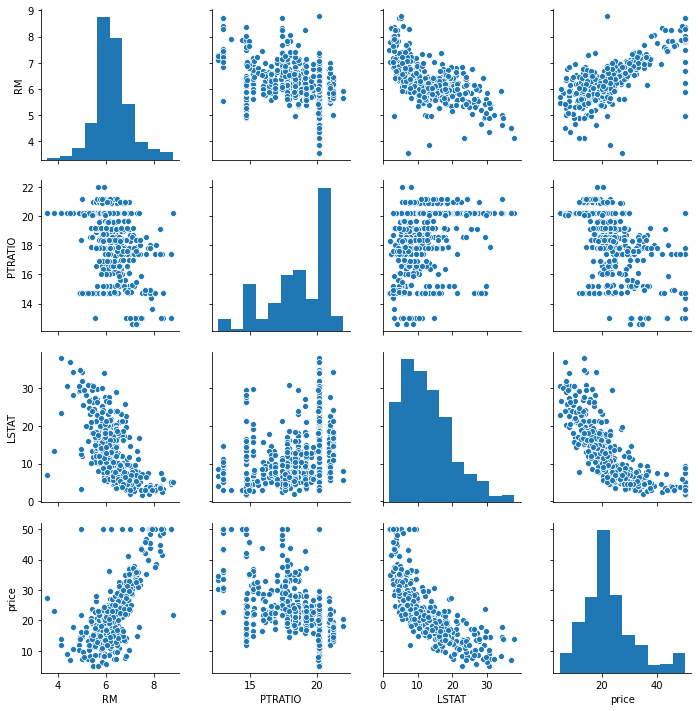

In [43]:
sns.pairplot(corr_data)

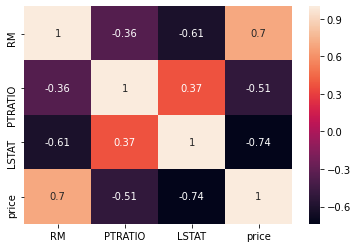

In [45]:
sns.heatmap(corr_data.corr(),annot=True)

In [46]:
x= corr_data.drop(labels=['price'],axis =1)
y= corr_data['price']
x.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [47]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred = model.predict(X_test)

In [54]:
mean_squared_error(y_true=y_test,y_pred=y_pred)

41.67799012221682

In [53]:
mean_absolute_error(y_pred=y_pred,y_true=y_test)

4.404434993909257

In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_true=y_test,y_pred=y_pred)

0.4881642015692508

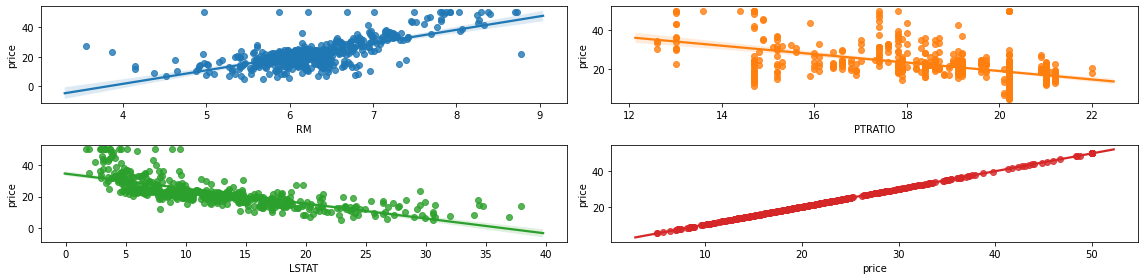

In [62]:
rows=2
cols=2
fig,ax = plt.subplots(rows,cols,figsize=(16,4))

col = corr_data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=corr_data[col[index]],y=corr_data['price'],ax = ax[i][j])
        index=index+1
fig.tight_layout()